In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived: 생존 여부 (1, 0)
- Pclass: 티켓의 클래스 (1 = 1st, 2= 2nd, 3 = 3rd)
- Sex: 성별
- Age: 나이
- SibSp: 함께 탑승한 형제와 배우자의 수
- Parch: 함께 탑승한 부모, 아이의 수
- Ticket: 티켓 번호
- Fare: 탑승료
- Cabin: 객실 번호
- Embarked: 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()
# describe(): 각 feature가 가진 통계치 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<Axes: >

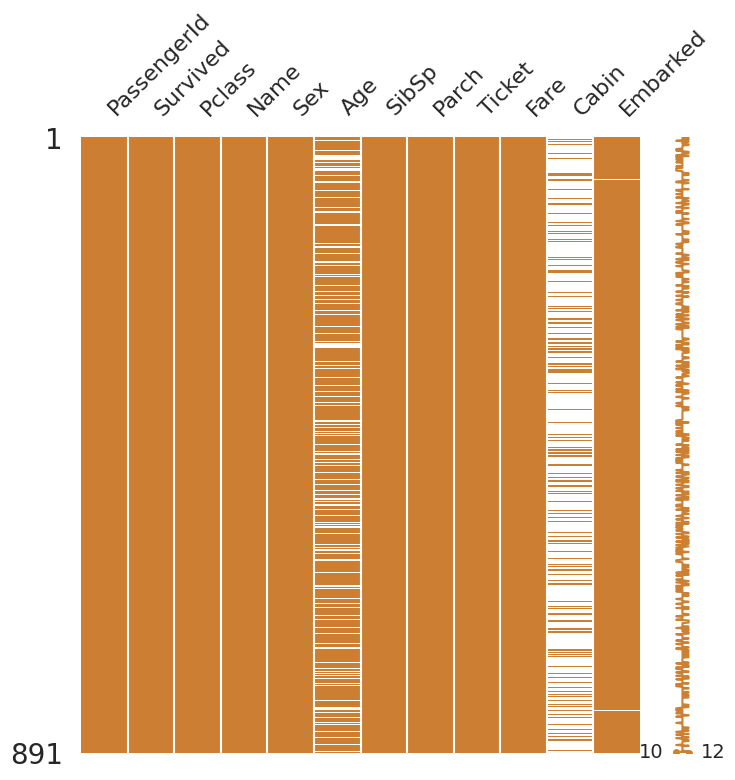

In [10]:
msno.matrix(df=train, figsize=(8, 8), color=(0.8, 0.5, 0.2))
# Null 값 시각화

<Axes: >

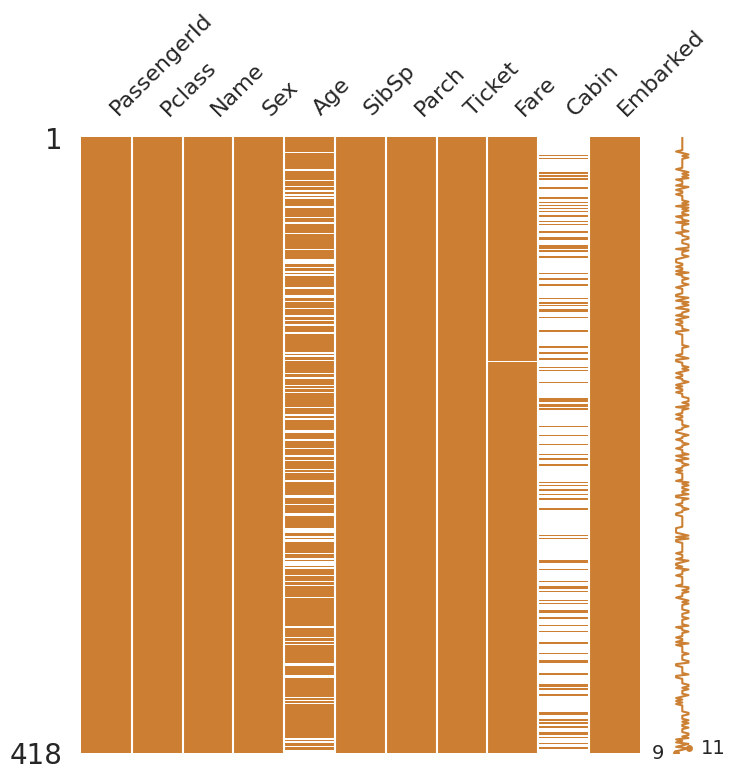

In [11]:
msno.matrix(df=test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


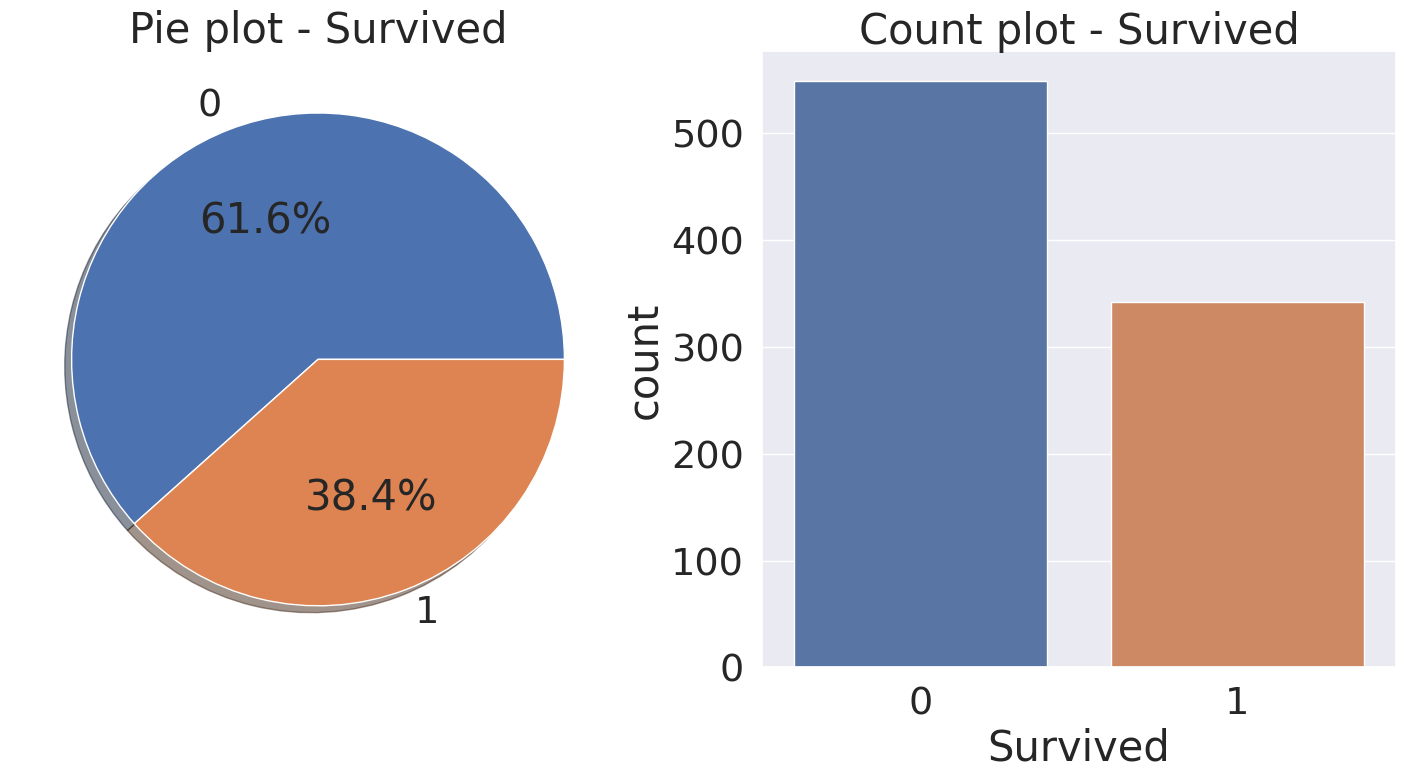

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


<Axes: xlabel='Pclass'>

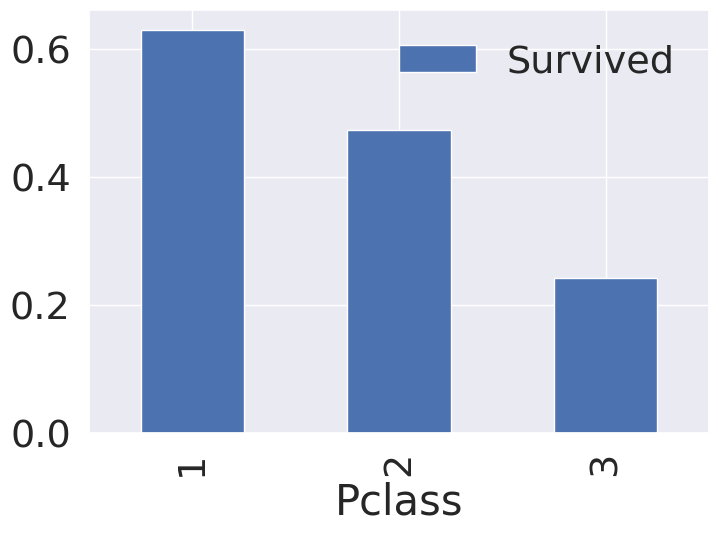

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

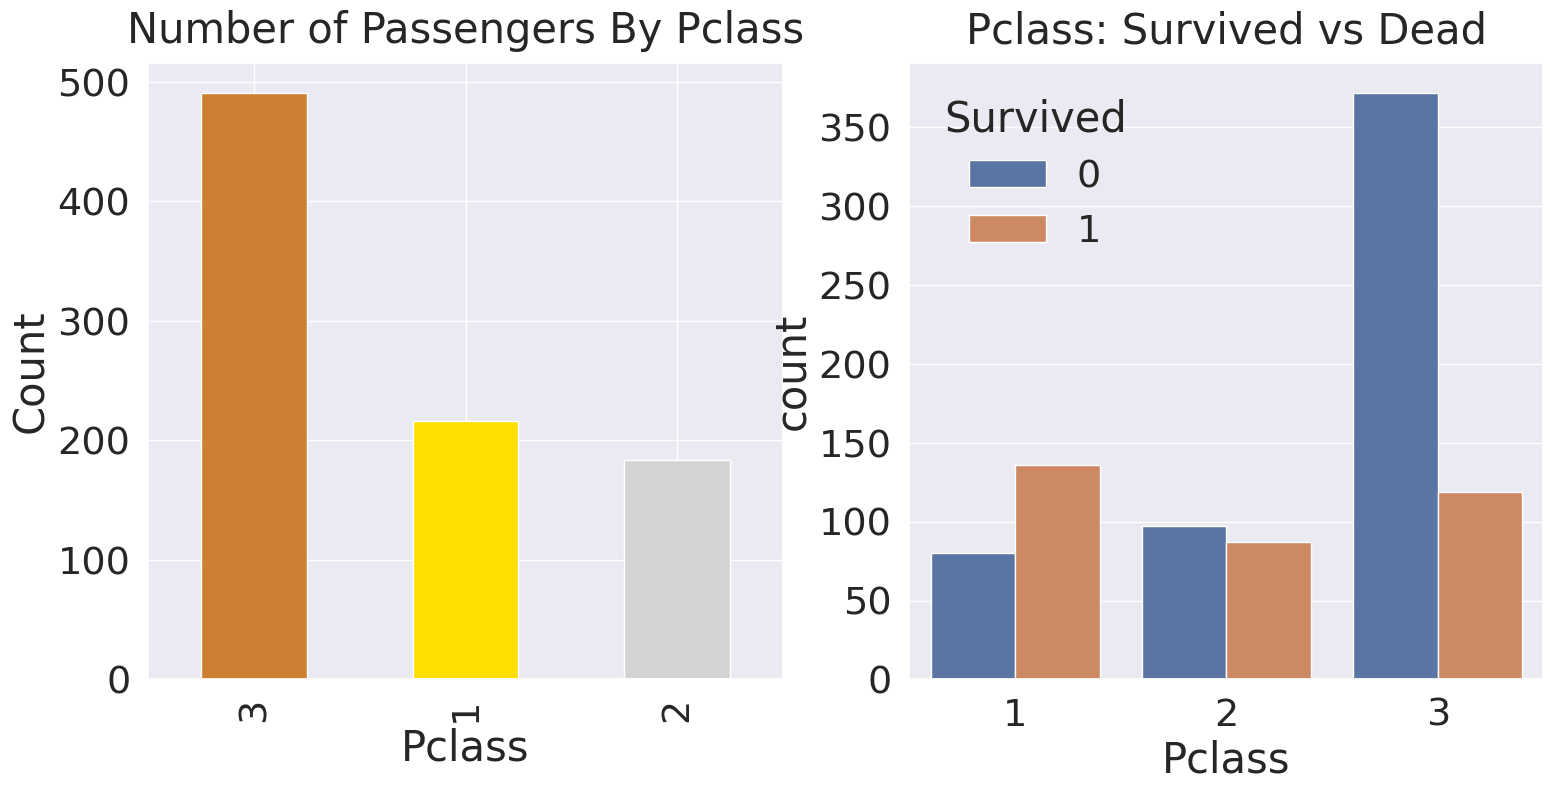

In [17]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

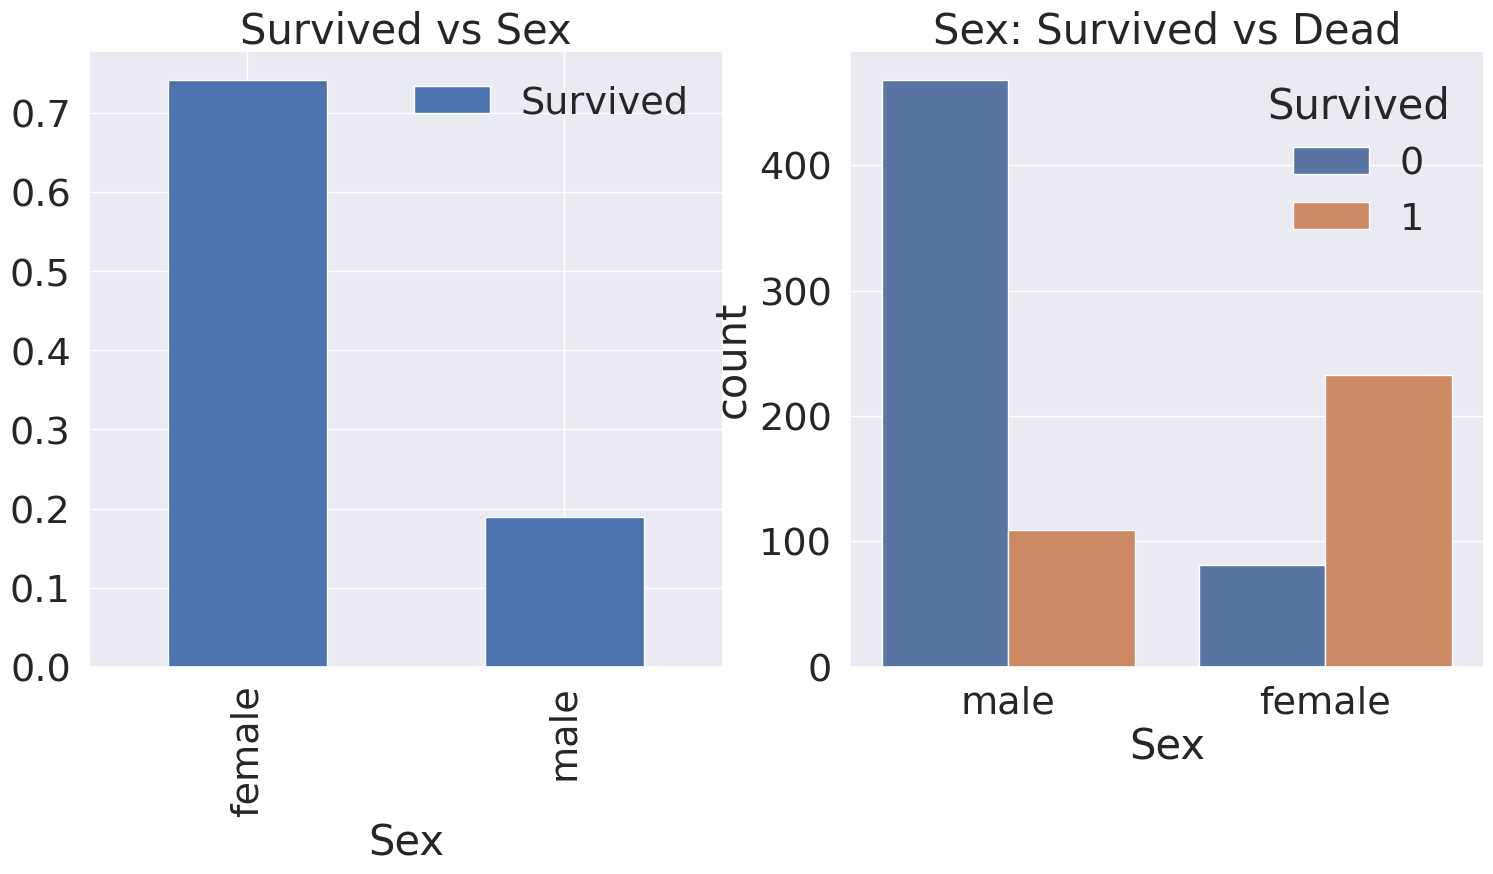

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [19]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


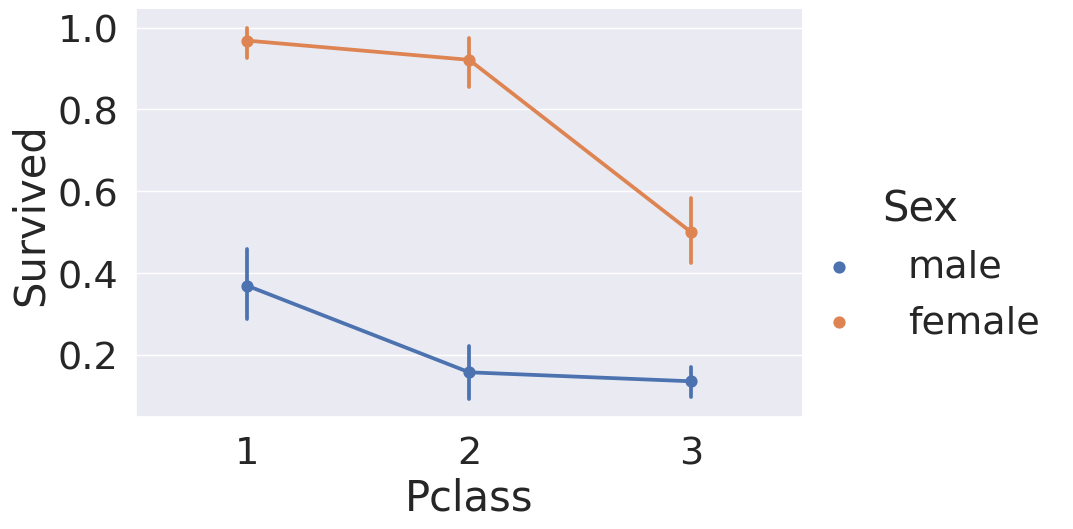

In [21]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point', height=6, aspect=1.5)

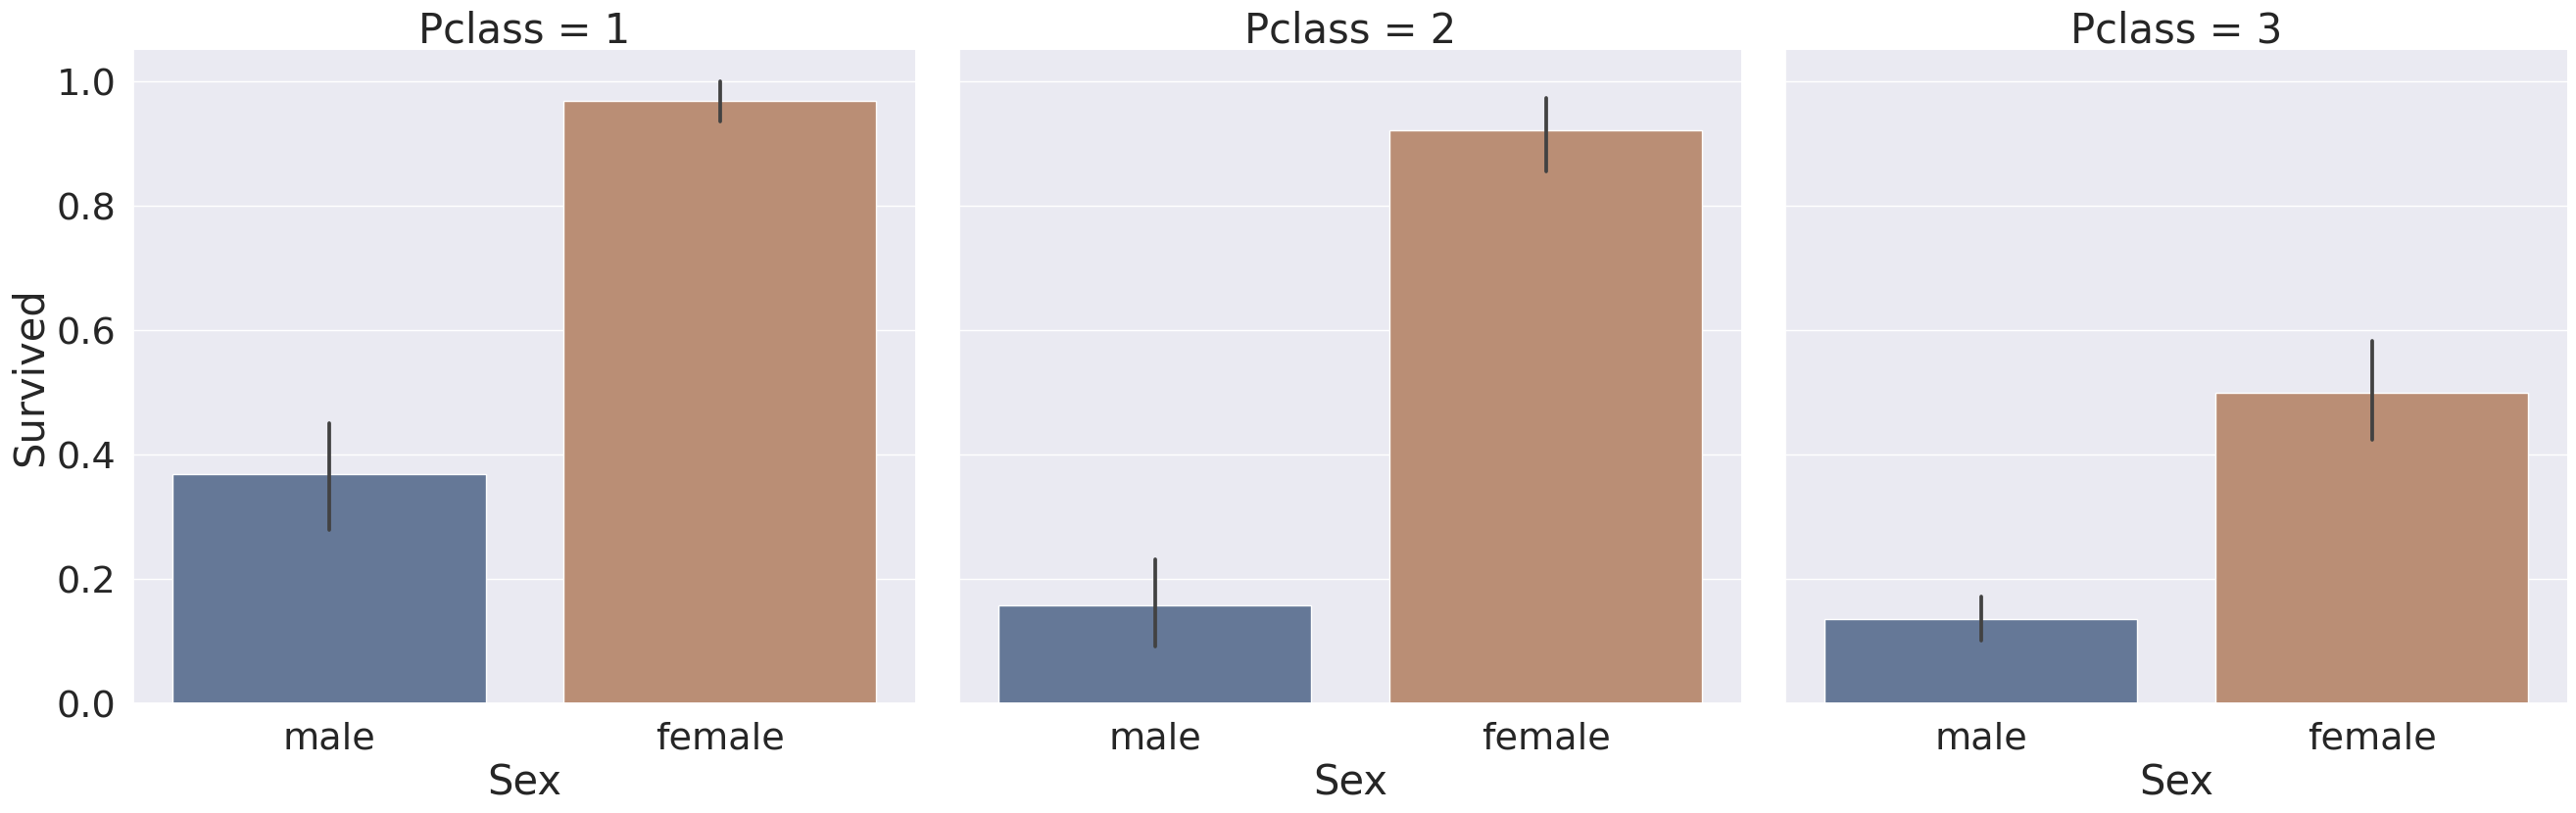

In [22]:
sns.catplot(
    x='Sex',
    y='Survived',
    col='Pclass',
    data=train,
    kind='bar',
    saturation=0.5,
    height=9,
    aspect=1
)

In [23]:
print('제일 나이 많은 탑승객 : ',round(train['Age'].max()))
print('제일 어린 탑승객 : ',round(train['Age'].min()))
print('탑승객 평균 나이 : ',round(train['Age'].mean()))

제일 나이 많은 탑승객 :  80
제일 어린 탑승객 :  0
탑승객 평균 나이 :  30


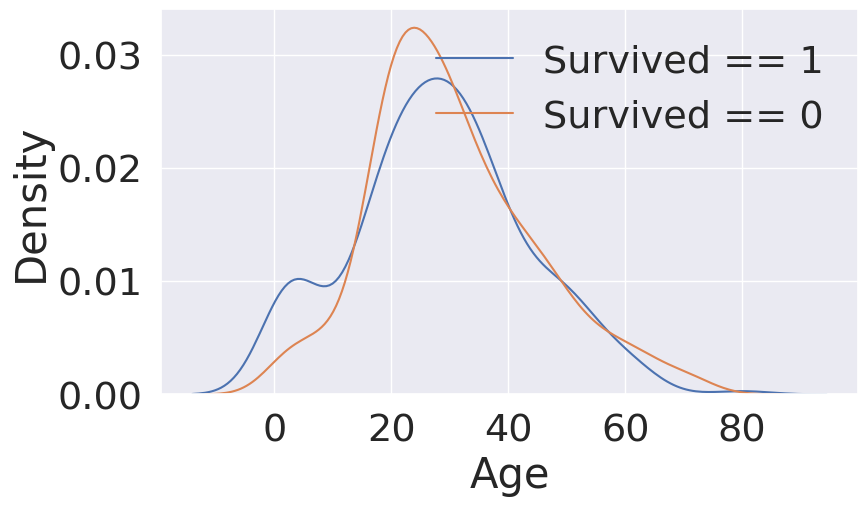

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

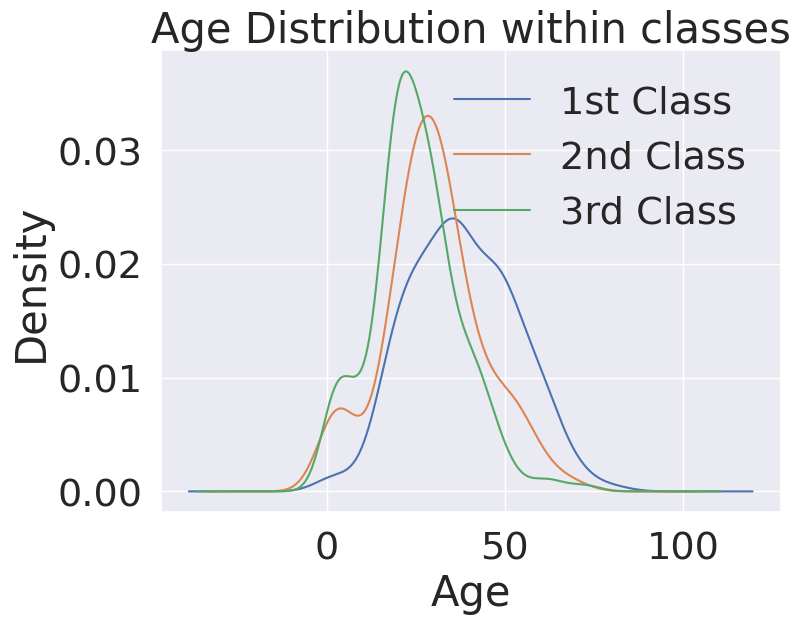

In [25]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

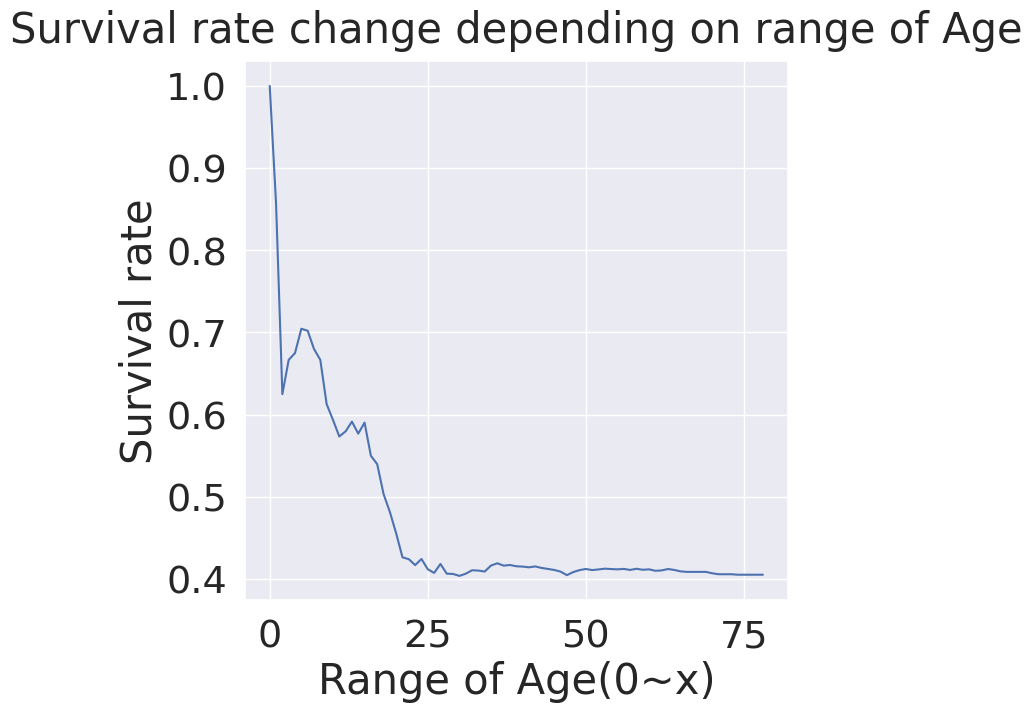

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [27]:
train.groupby(['Embarked','Pclass'])['Fare'].median() 

Embarked  Pclass
C         1         78.2667
          2         24.0000
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         13.5000
          3          8.0500
Name: Fare, dtype: float64

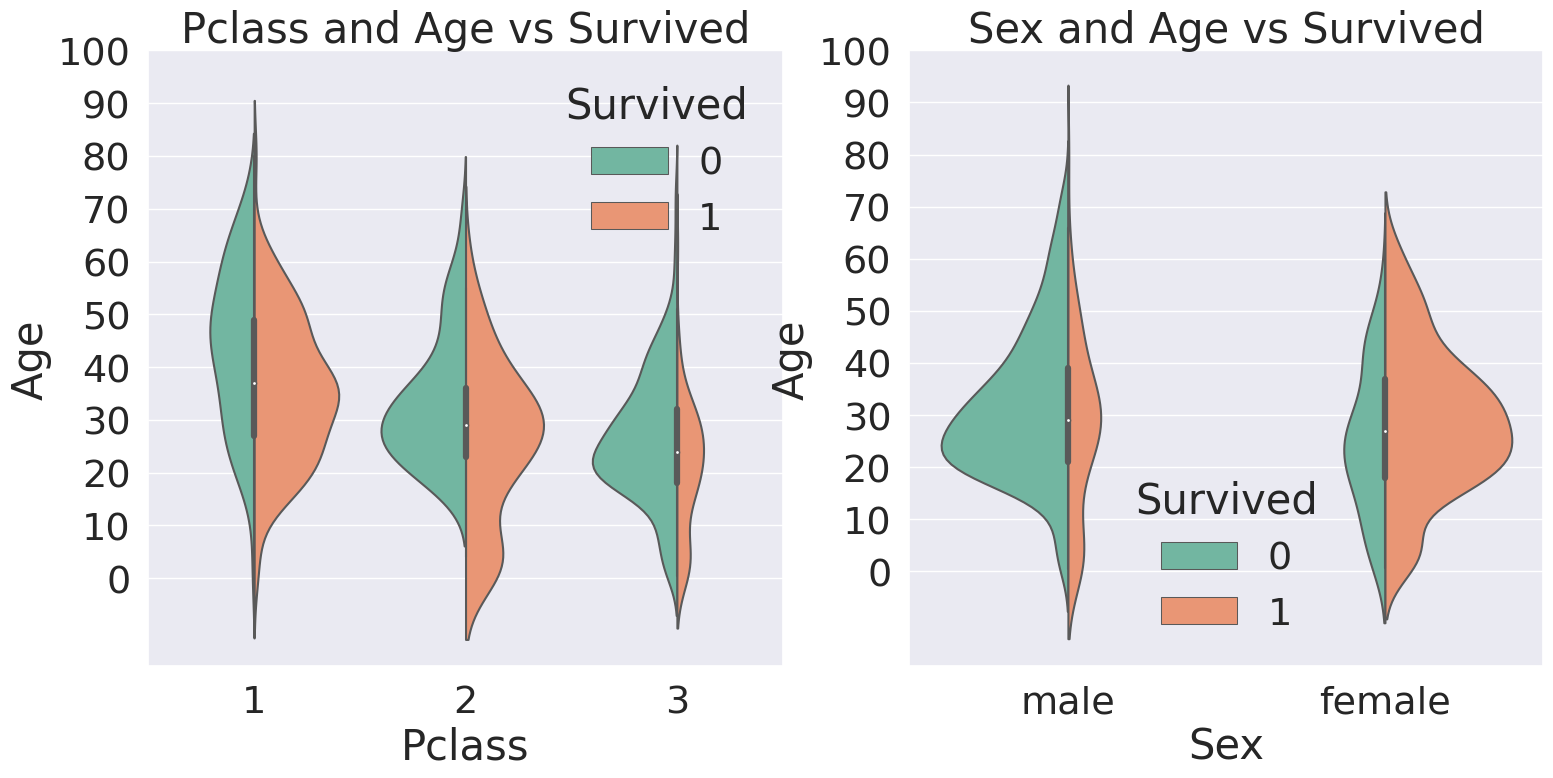

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#=== Pclass - Age 간 생존 여부 ===#
sns.violinplot(
    x='Pclass',
    y='Age',
    hue='Survived',
    data=train,
    scale='count',
    split=True,
    palette='Set2',
    ax=ax[0]
)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#=== Sex - Age간 생존 여부 ===#
sns.violinplot(
    x='Sex',
    y='Age',
    hue='Survived',
    data=train,
    scale='count',
    split=True,
    palette='Set2',
    ax=ax[1]
)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<Axes: xlabel='Embarked'>

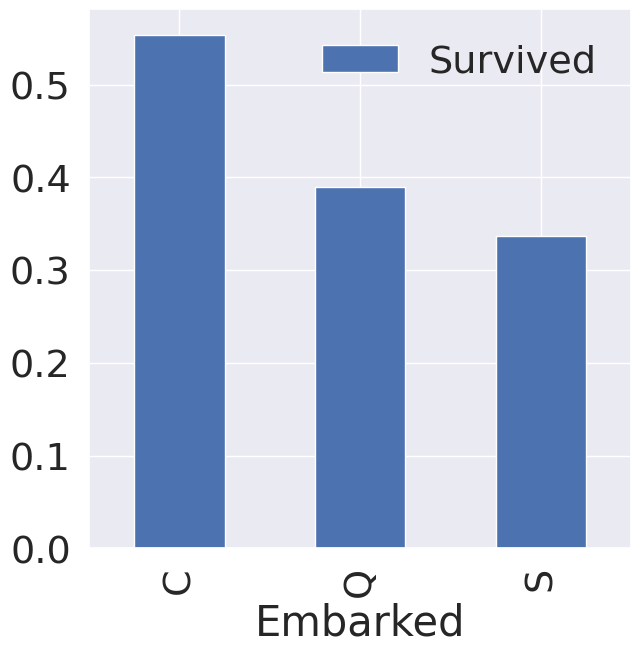

In [29]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

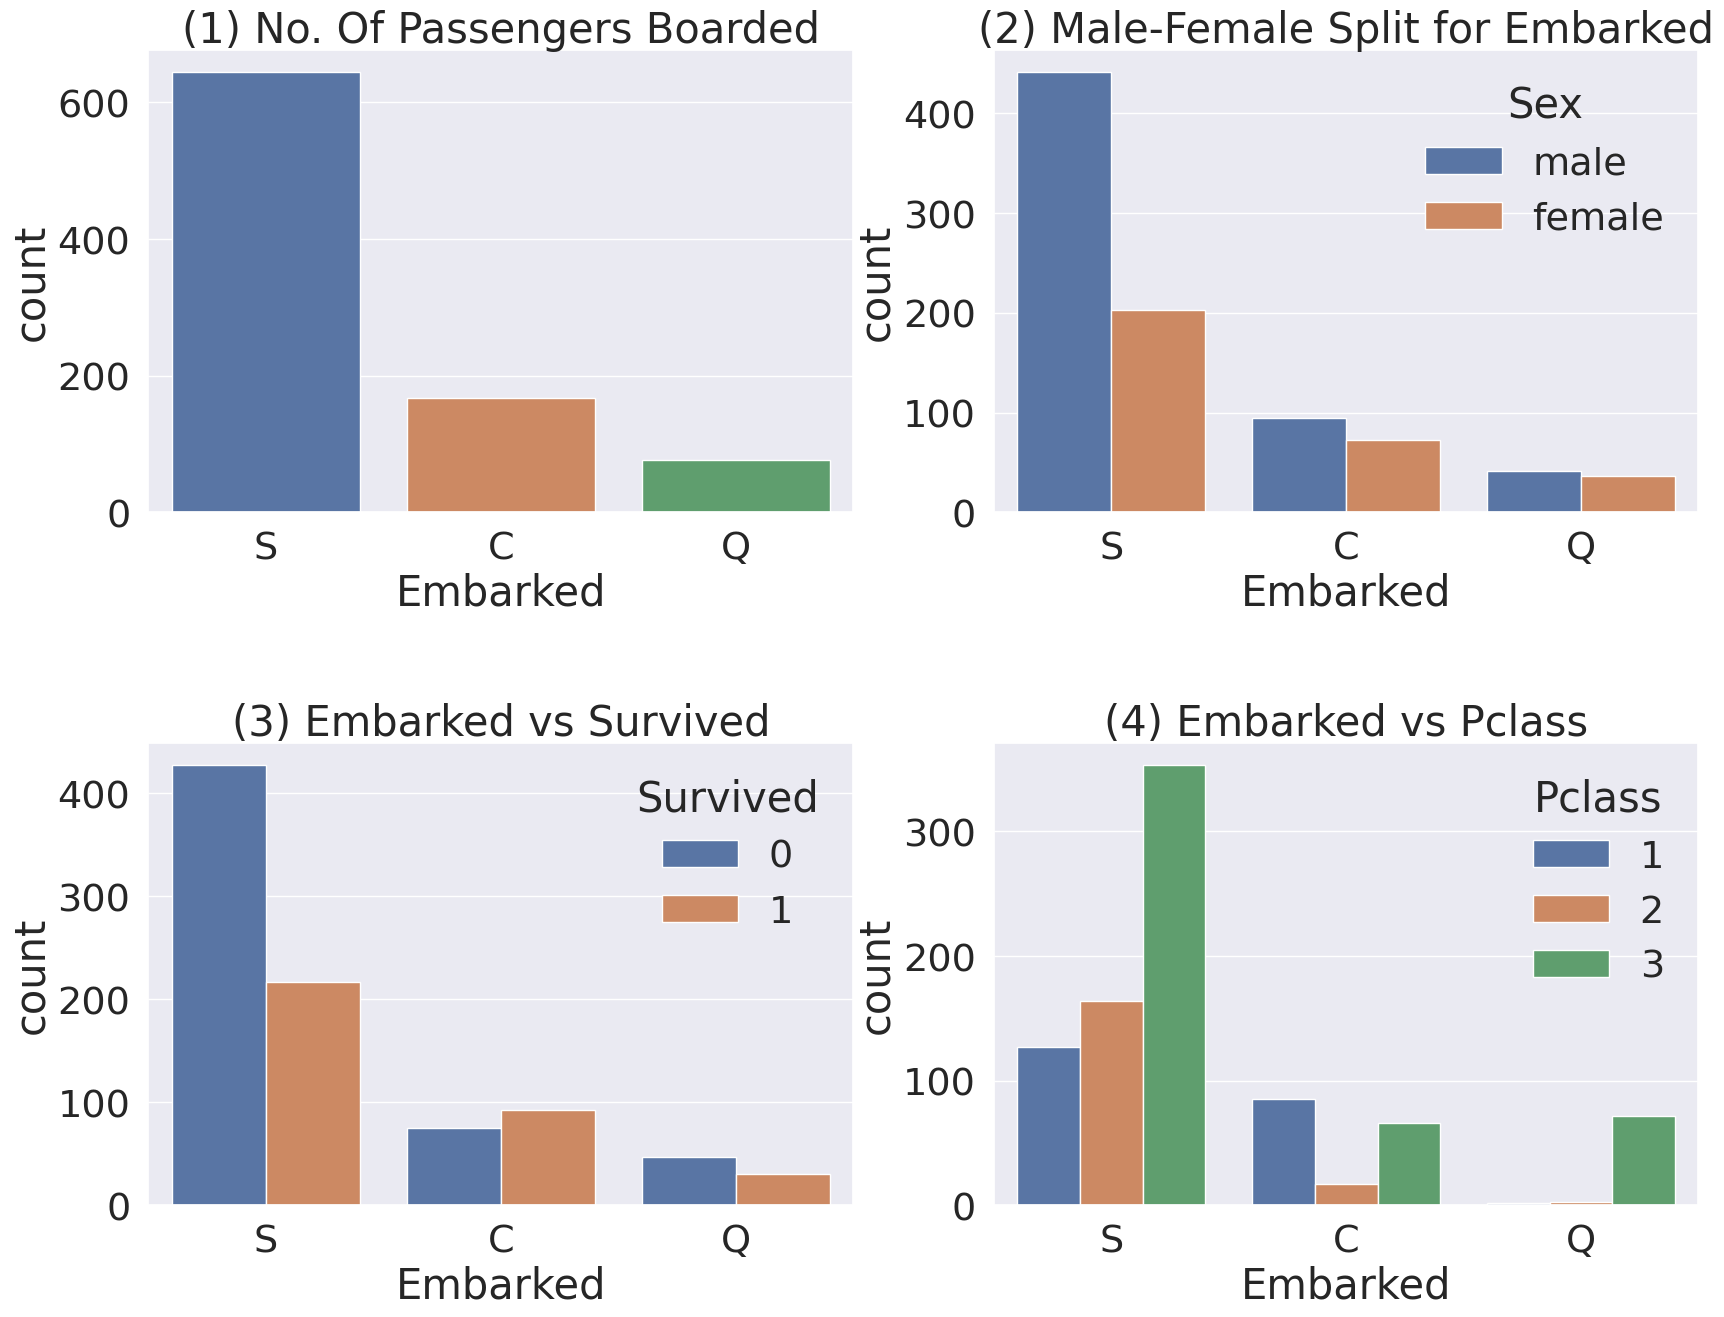

In [30]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())
print("Mean size of Family: ", train['FamilySize'].mean())

Maximum size of Family:  11
Minimum size of Family:  1
Mean size of Family:  1.904601571268238


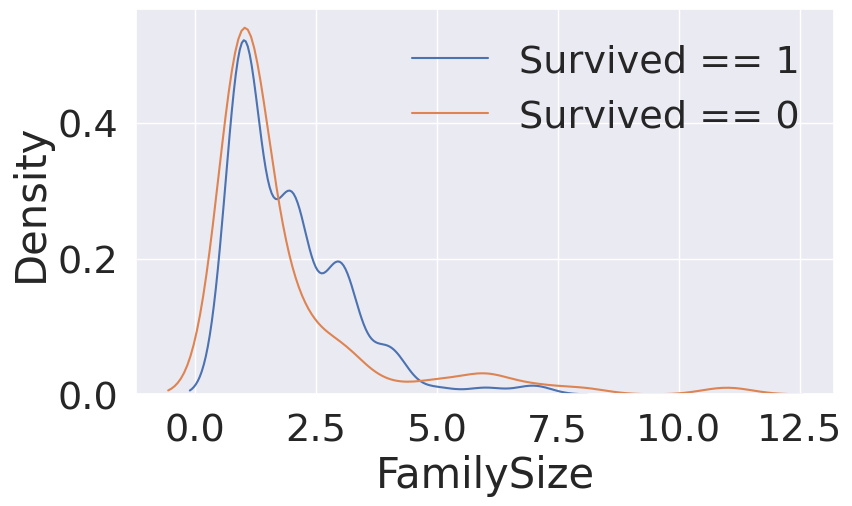

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['FamilySize'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['FamilySize'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

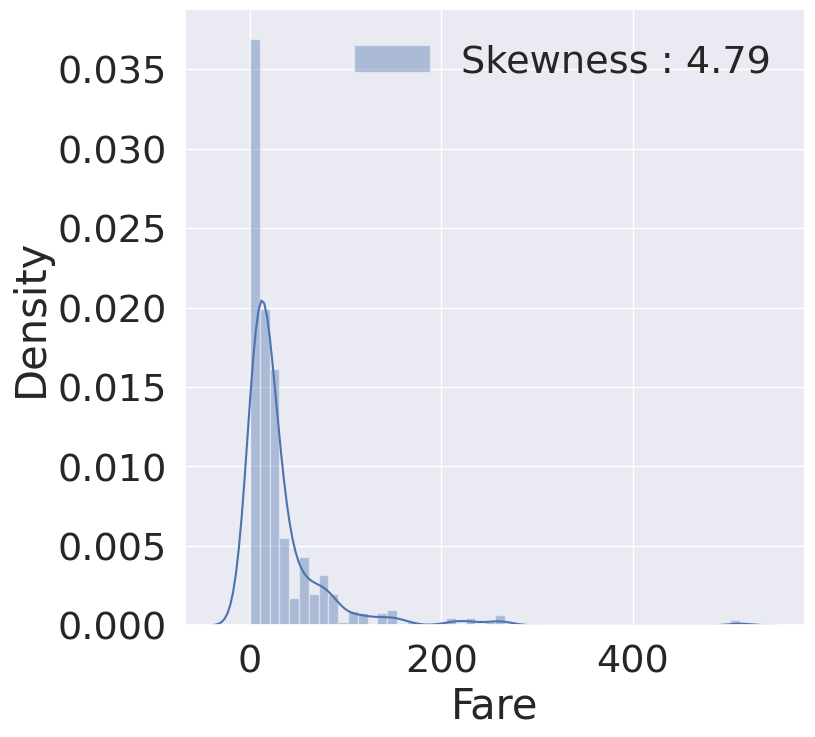

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [36]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [37]:
print(train['Fare'].min(), test['Fare'].min())

0.0 0.0


In [38]:
train['Fare'] = np.log1p(train['Fare'])
test['Fare'] = np.log1p(test['Fare'])

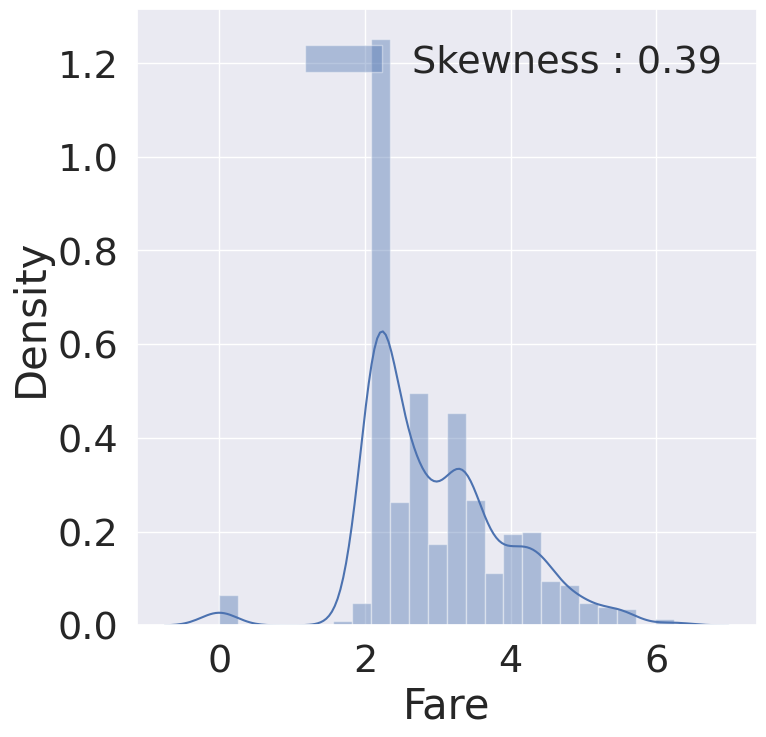

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [40]:
train.isnull().sum() / len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
FamilySize     0.000000
dtype: float64

In [41]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,S,3


In [43]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
FamilySize     0.000000
dtype: float64

In [44]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [45]:
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
FamilySize       0
dtype: int64 

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
FamilySize      0
dtype: int64


In [46]:
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mrs'

In [47]:
train['Initial'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [48]:
test['Initial'] = test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [49]:
train['Initial'].value_counts()

Initial
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [50]:
train.groupby(['Sex', 'Initial'])['Initial'].count()

Sex     Initial     
female  Dr                1
        Lady              1
        Miss            182
        Mlle              2
        Mme               1
        Mrs             125
        Ms                1
        the Countess      1
male    Capt              1
        Col               2
        Don               1
        Dr                6
        Jonkheer          1
        Major             2
        Master           40
        Mr              517
        Rev               6
        Sir               1
Name: Initial, dtype: int64

In [51]:
test.groupby(['Sex', 'Initial'])['Initial'].count()

Sex     Initial
female  Dona         1
        Miss        78
        Mrs         72
        Ms           1
male    Col          2
        Dr           1
        Master      21
        Mr         240
        Rev          2
Name: Initial, dtype: int64

In [52]:
def map_title_simple(row):
    sex = row['Sex']
    title = row['Initial']

    if sex == 'female':
        if title in ['Miss', 'Mme', 'Mlle', 'Ms']:
            return 'Miss'
        elif title in ['Mrs', 'Lady', 'the Countess']:
            return 'Mrs'
        else:
            return 'Other'
    else:
        if title == 'Master':
            return 'Master'
        elif title in ['Jonkheer', 'Col', 'Rev']:
            return 'Other'
        else:
            return 'Mr'

train['Initial'] = train.apply(map_title_simple, axis=1)
test['Initial'] = test.apply(map_title_simple, axis=1)

In [53]:
train.groupby(['Sex', 'Initial'])['Initial'].count()

Sex     Initial
female  Miss       186
        Mrs        127
        Other        1
male    Master      40
        Mr         528
        Other        9
Name: Initial, dtype: int64

In [54]:
test.groupby(['Sex', 'Initial'])['Initial'].count()

Sex     Initial
female  Miss        79
        Mrs         72
        Other        1
male    Master      21
        Mr         241
        Other        4
Name: Initial, dtype: int64

In [55]:
train.loc[(train['Age'].isnull())&(train['Initial']=='Mr'),'Age'] = 33
train.loc[(train['Age'].isnull())&(train['Initial']=='Mrs'),'Age'] = 36
train.loc[(train['Age'].isnull())&(train['Initial']=='Master'),'Age'] = 5
train.loc[(train['Age'].isnull())&(train['Initial']=='Miss'),'Age'] = 22
train.loc[(train['Age'].isnull())&(train['Initial']=='Other'),'Age'] = 46

test.loc[(test['Age'].isnull())&(test['Initial']=='Mr'),'Age'] = 33
test.loc[(test['Age'].isnull())&(test['Initial']=='Mrs'),'Age'] = 36
test.loc[(test['Age'].isnull())&(test['Initial']=='Master'),'Age'] = 5
test.loc[(test['Age'].isnull())&(test['Initial']=='Miss'),'Age'] = 22
test.loc[(test['Age'].isnull())&(test['Initial']=='Other'),'Age'] = 46

In [56]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
FamilySize     0
Initial        0
dtype: int64

In [57]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Initial        0
dtype: int64

In [58]:
train['Embarked'] = train['Embarked'].fillna('S')

In [59]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Initial        0
dtype: int64

In [60]:
train['Sex'] = train['Sex'].replace(['male','female'],[0,1]).astype('category')
test['Sex'] = test['Sex'].replace(['male','female'],[0,1]).astype('category')

In [61]:
train = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Embarked')
test = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Embarked')
print(train.shape, test.shape)

(891, 15) (418, 14)


In [62]:
train_initial_groupby = train.groupby(['Initial'])['Survived'].mean().to_dict()
train_initial_groupby

{'Master': 0.575,
 'Miss': 0.7043010752688172,
 'Mr': 0.16098484848484848,
 'Mrs': 0.7952755905511811,
 'Other': 0.2}

In [63]:
train['Initial_mean'] = train['Initial'].map(train_initial_groupby)
test['Initial_mean'] = test['Initial'].map(train_initial_groupby)

In [64]:
train_initial_groupby = train.groupby(['Initial'])['Survived'].std().to_dict()
train_initial_groupby

{'Master': 0.5006406152531231,
 'Miss': 0.4575880310508566,
 'Mr': 0.3678654977541763,
 'Mrs': 0.40509812013774216,
 'Other': 0.4216370213557839}

In [65]:
train['Initial_std'] = train['Initial'].map(train_initial_groupby)
test['Initial_std'] = test['Initial'].map(train_initial_groupby)

In [66]:
train = train.drop(['Initial'],axis=1)
test = test.drop(['Initial'],axis=1)

In [67]:
train.shape, test.shape

((891, 16), (418, 15))

In [68]:
train = train.drop(['Name', 'Ticket'],axis=1)
test = test.drop(['Name', 'Ticket'],axis=1)

In [69]:
y = train['Survived']
X = train.drop(['Survived'], axis=1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 30, test_size = 0.2)

In [71]:
print(X_train.shape, y_train.shape, X_valid.shape,  y_valid.shape)

(712, 13) (712,) (179, 13) (179,)


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [73]:
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
print('train_score : ', (pred_train == y_train).mean())
pred_valid = model.predict(X_valid)
print('valid_score : ', (pred_valid == y_valid).mean())

train_score :  1.0
valid_score :  0.7541899441340782


In [74]:
pred_test = model.predict(test)

In [75]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission['Survived'] = pred_test

In [77]:
submission.to_csv('submission_final.csv', index=False)